## Atividade Avaliativa 1.2 - _Churn Prediction_

- Redes Neurais Artificiais 2025.2
- Profa. Elloá B. Guedes (ebgcosta@uea.edu.br)
- http://github.com/elloa

### Equipe

- Integrante 1 (github.com/integrante1)
- Integrante 2 (github.com/integrante2)
- Integrante 3 (github.com/integrante3)
- Integrante 4 (github.com/integrante4)

### Apresentação

A previsão de evasão de clientes (_Churn Prediction_) é um problema tipicamente abordado pela Ciência de Dados com o uso de modelos de _Machine Learning_ para identificar clientes com alta probabilidade de descontinuar o uso de um serviço ou produto. Possui extrema importância para o domínio de negócios, especialmente para empresas com modelos de receita baseados em assinatura (SaaS, telecomunicações, serviços de streaming) ou que dependem da fidelidade do cliente, especialmente por:

1. **Impacto na Receita e Lucratividade.** O custo de adquirir um novo cliente é, em geral, significativamente maior do que o custo de reter um cliente existente. A evasão de clientes (churn) representa uma perda direta de receita recorrente. Ao prever quais clientes estão em risco, as empresas podem intervir com estratégias de retenção direcionadas, como ofertas especiais ou suporte aprimorado, minimizando essa perda financeira. A retenção de clientes não só protege a receita atual, mas também contribui para o aumento do _Lifetime Value_ do cliente, que é a receita total que um cliente gera ao longo de sua relação com a empresa;
2. **Otimização de Recursos e Estratégias.** Sem um modelo de previsão, as empresas tendem a adotar estratégias de retenção de forma genérica, aplicando os mesmos esforços a todos os clientes, independentemente do risco de evasão. Isso leva a um desperdício de recursos;
3. **Entendimento do Comportamento do Cliente.** A construção de um modelo de previsão de churn exige a análise aprofundada dos dados de comportamento do cliente. Esse processo revela insights valiosos sobre o que leva os clientes a ficarem ou a saírem, o que não apenas ajuda a reter clientes, mas também auxilia o desenvolvimento de produtos, a melhoria do serviço e a criação de estratégias de marketing mais eficazes para atrair clientes com um perfil de maior lealdade.

### Contexto do Problema

O termo _Telco_ se refere a _telecommunications industry_. Este domínio é particularmente relevante para a análise de churn devido ao seu alto nível de competição e saturação. Os clientes neste setor — seja para serviços de telefonia móvel, internet ou TV a cabo — têm uma vasta gama de provedores à sua escolha, o que torna relativamente fácil para eles migrarem caso estejam insatisfeitos ou encontrem uma oferta melhor.

### Base de Dados

Base de dados original: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

### Bibliotecas

Por hábito, a primeira célula do notebook costuma ser reservada para importação de bibliotecas.
A cada biblioteca nova acrescida, é necessário executar a célula para atualização e correta execução.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Parte 1 - Análise e Exploração de Dados

### Abertura do Dataset
Abra o dataset e visualize o seu cabeçalho, isto é, os primeiros exemplos nele contidos. Isto é útil para checar se a importação foi realizada de maneira adequada e se a disposição dos dados está de acordo para os próximos passos do trabalho.

In [43]:
df = pd.read_csv('dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Conhecendo o dataset

Para praticar conceitos relativos à exploração do conjunto de dados, utilize as células a seguir para prover respostas para cada uma das respostas elencadas

#### Quantos exemplos há no dataset?

In [44]:
df.shape[0]

7043

#### Dados Faltantes

- Elimine todas as entradas em que há dados faltantes
- Qual o decréscimo percentual no tamanho do dataset?

In [45]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Como mostrado na tabela anterior, não há dados faltantes no conjunto de dados

#### Dados Duplicados

- Verifique se há clientes duplicados (mesmo id é repetido)
- Em caso afirmativo, elimine as duplicatas, favorecendo as entradas mais recentes

In [46]:
# Verifica se há valores duplicados na coluna 'customerID'
df['customerID'].duplicated().sum()

np.int64(0)

#### Quais os atributos existentes no dataset e seu tipo?

- Exemplos de tipos de dados são categóricos (nominal ou ordinal), numéricos (discreto ou contínuo), textual ou estampa de tempo. Faça uma análise e agrupe por categoria na sua resposta. Observe que analisar os tipos das variáveis não é suficiente.

In [47]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


##### Tipos de atributos

- Nominal: gender, partner, dependents, phoneService, multiplesLines, internetService, onlineSecurity, onlineBackup, deviceProtection, techSupport, streamingTV, streamingMovies, paperlessBilling, paymentMethod, churn

- Ordinal: contract

- Discreto: seniorCitizen, tenure

- Contínuo: monthlyCharges, totalCharges

- Textual: customerID

- Timestamp:  

#### Qual cliente paga o maior valor de assinatura mensal e que não faz streaming de filmes?

- Apresente o valor pago mensalmente e os demais atributos desse cliente

In [48]:
cliente_maior_mensal_sem_filmes = df[df['StreamingMovies'] == 'No'].sort_values('MonthlyCharges', ascending=False).iloc[0]

print("Valor pago mensalmente:", cliente_maior_mensal_sem_filmes['MonthlyCharges'])

print("Dados do cliente:\n", cliente_maior_mensal_sem_filmes)

Valor pago mensalmente: 106.75
Dados do cliente:
 customerID                9572-MTILT
gender                          Male
SeniorCitizen                      0
Partner                          Yes
Dependents                        No
tenure                            59
PhoneService                     Yes
MultipleLines                    Yes
InternetService          Fiber optic
OnlineSecurity                   Yes
OnlineBackup                     Yes
DeviceProtection                 Yes
TechSupport                      Yes
StreamingTV                      Yes
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                106.75
TotalCharges                  6252.9
Churn                            Yes
Name: 5544, dtype: object


#### Histograma do tempo de permanência

O histograma é um gráfico que mostra as frequências de uma determinada informação. No nosso caso, vamos construir histogramas que mostram o tempo de permanência no serviço (tenure). Vamos agrupar os valores em bins, cujo número deve ser definido pela Regra de Sturges.

- Plote dois histogramas, um para os clientes que evadiram do serviço e outro para os que continuaram sua assinatura
- Rotule os eixos e utilize boas práticas de visualização da informação
- Faça a seguinte análise: as distribuições são diferentes?

Documentação completa disponível em: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html


In [49]:
churn_yes = df[df['Churn'] == 'Yes']['tenure']
churn_no = df[df['Churn'] == 'No']['tenure']

# Determinar número de bins pela Regra de Sturges
n = len(df['tenure'])
bins = math.ceil(1 + 3.322 * math.log10(n))

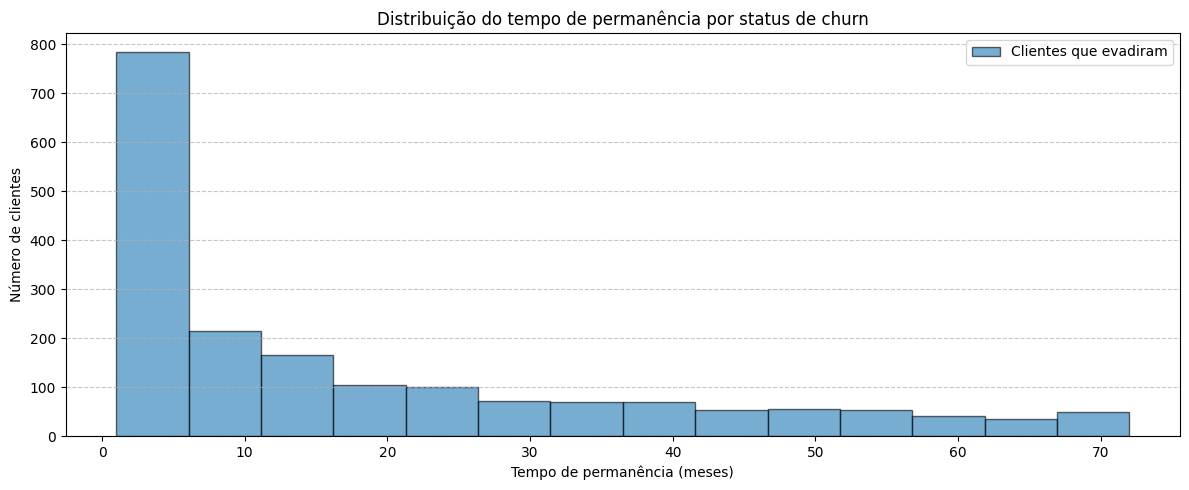

In [50]:
plt.figure(figsize=(12, 5))

plt.hist(churn_yes, bins=bins, alpha=0.6, label='Clientes que evadiram', edgecolor='black')

plt.xlabel('Tempo de permanência (meses)')
plt.ylabel('Número de clientes')
plt.title('Distribuição do tempo de permanência por status de churn')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

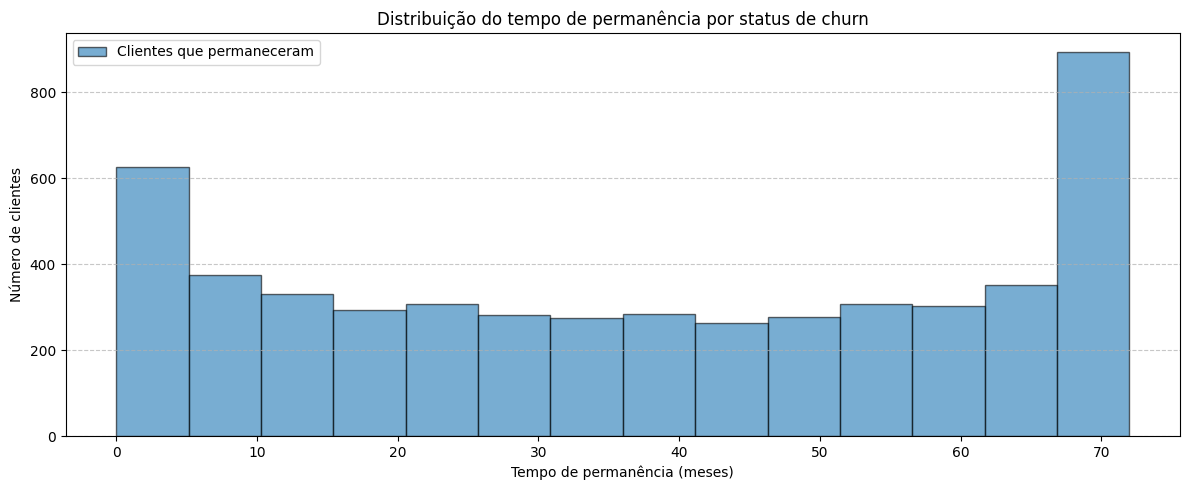

In [51]:
plt.figure(figsize=(12, 5))

plt.hist(churn_no, bins=bins, alpha=0.6, label='Clientes que permaneceram', edgecolor='black')

plt.xlabel('Tempo de permanência (meses)')
plt.ylabel('Número de clientes')
plt.title('Distribuição do tempo de permanência por status de churn')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Pode-se observar nestes histogramas que os clientes que evadiram costumam se concentrar nos primeiros meses, quando conhecem o serviço e decidem não continuar a pagá-lo.

Por outro lado, clientes que permaneceram no serviço costumam ter uma distribuição mais uniforme, sendo o pico na maior quantidade de tempo, demonstrando uma fidelidade no pagamento do serviço.

#### Boxplot das Cobranças Mensais

Como é a distribuição das cobranças mensais? O gráfico boxplot pode nos ajudar nesta questão.

O boxplot ilustra informações importantes:
- Mediana
- Limite inferior (menor valor)
- Limite superior (maior valor)
- Q1 (primeiro quartil, 25% dos dados)
- Q3 (terceiro quartil, 75% dos dados)
- Outliers (se houver)

A distribuição dos exemplos no dataset é simétrica no tocante ao atributo em questão? Elabore um parágrafo que justifique as conclusões obtidas a partir da análise do boxplot.

Documentação completa disponível em: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

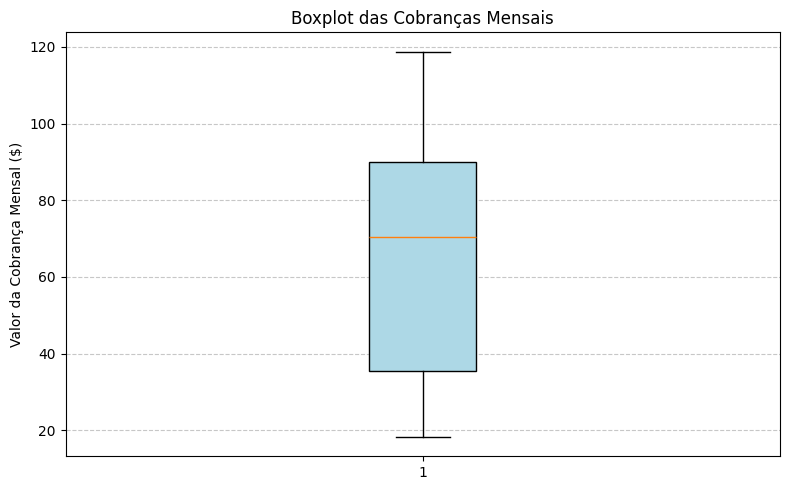

In [52]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['MonthlyCharges'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

plt.title('Boxplot das Cobranças Mensais')
plt.ylabel('Valor da Cobrança Mensal ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

O boxplot revela que a maioria dos assinantes se concentra em assinaturas com valores menores, em torno de R$40 a R$80, com a mediana estando em R$50.

Também é possível observar a diferença nos valores pagos de assinatura, indo de R$ 20 - R$120.

#### Taxa de Churn

- Qual a taxa de churn para cada perfil de tipo de pagamento mensal? Há diferenças?

In [53]:
churn_rate_by_payment = (
    df.groupby('PaymentMethod')['Churn']
    .apply(lambda x: (x == 'Yes').mean() * 100)
)

print(churn_rate_by_payment)

PaymentMethod
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Electronic check             45.285412
Mailed check                 19.106700
Name: Churn, dtype: float64


#### Avaliação de Hipóteses

Analise as seguintes hipóteses, elaborando gráficos e consulta aos dados para embasar suas justificativas:

- Hipótese 1: "Clientes que optaram por serviços como TechSupport (suporte técnico) têm uma probabilidade menor de churn."
- Hipótese 2: "A taxa de churn é significativamente maior para clientes com contratos de curto prazo em comparação com aqueles com contratos de longo prazo."
- Hipótese 3: "Clientes com múltiplos serviços, com dependentes e que fazem backup online possuem baixa probabilidade de trocar de prestadora"

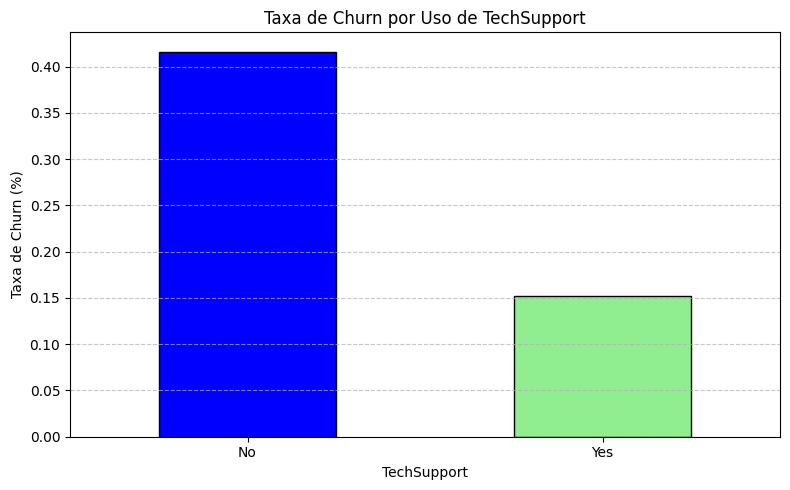

In [54]:
tech_churn = df.groupby('TechSupport')['Churn'].value_counts(normalize=True).unstack()['Yes']

tech_churn = tech_churn[['No', 'Yes']]

tech_churn.plot(kind='bar', color=['blue', 'lightgreen'], edgecolor='black', figsize=(8, 5))

plt.title('Taxa de Churn por Uso de TechSupport')
plt.ylabel('Taxa de Churn (%)')
plt.xlabel('TechSupport')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

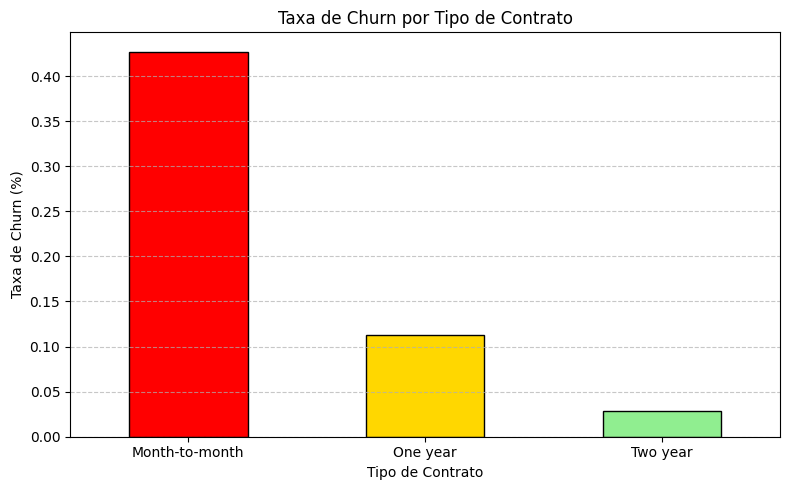

In [55]:
churn_rate_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()['Yes']
churn_rate_contract = churn_rate_contract[['Month-to-month', 'One year', 'Two year']]

churn_rate_contract.plot(kind='bar', color=['red', 'gold', 'lightgreen'], edgecolor='black', figsize=(8, 5))

plt.title('Taxa de Churn por Tipo de Contrato')
plt.ylabel('Taxa de Churn (%)')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [56]:
addons = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['num_services'] = (df[addons] == 'Yes').sum(axis=1)


df['Perfil_Alta_Retencao'] = (
    (df['num_services'] >= 3) &
    (df['Dependents'] == 'Yes') &
    (df['OnlineBackup'] == 'Yes')
)


churn_rate_perfil = df.groupby('Perfil_Alta_Retencao')['Churn'].value_counts(normalize=True).unstack()['Yes']
print(churn_rate_perfil)

Perfil_Alta_Retencao
False    0.280661
True     0.108626
Name: Yes, dtype: float64


#### Perfil do Cliente de Risco

Crie uma série de 3 a 4 gráficos conectados que, juntos, respondam à seguinte pergunta:

_**Qual é o perfil do cliente com alta probabilidade de churn e o que mais o influencia a sair?**_

1. Visualização da Distribuição de Permanência (Tenure)  
- Gráfico: Histograma ou gráfico de densidade comparando o tempo de permanência (tenure) de clientes que saíram (Churn = Yes) com o de clientes que ficaram (Churn = No).
- Objetivo: Mostrar visualmente se o churn é mais comum entre clientes novos ou antigos.

2. Análise da Relação entre Tipo de Contrato e Evasão
- Gráfico: Gráfico de barras agrupadas ou empilhadas que mostre a taxa de churn para cada tipo de contrato (Monthly, One year, Two year).
- Objetivo: Demonstrar o impacto do tipo de contrato na decisão do cliente de sair.

3. Combinação de Variáveis: Preços e Serviços
- Gráfico: Gráfico de dispersão (scatter plot) ou um gráfico de box plot que combine duas variáveis-chave, como MonthlyCharges (cobranças mensais) e o tipo de serviço de internet (InternetService), segmentado pela variável Churn.
- Objetivo: Revelar se clientes que pagam mais por um tipo específico de serviço (ex: Fibra Óptica) têm uma taxa de churn diferente. Isso pode sugerir, por exemplo, que a insatisfação está ligada à qualidade de um serviço mais caro.


Escreva um breve parágrafo resumindo as descobertas. A resposta deve conectar as visualizações, respondendo à pergunta inicial sobre o perfil do cliente em risco de forma coesa e baseada nas evidências visuais.

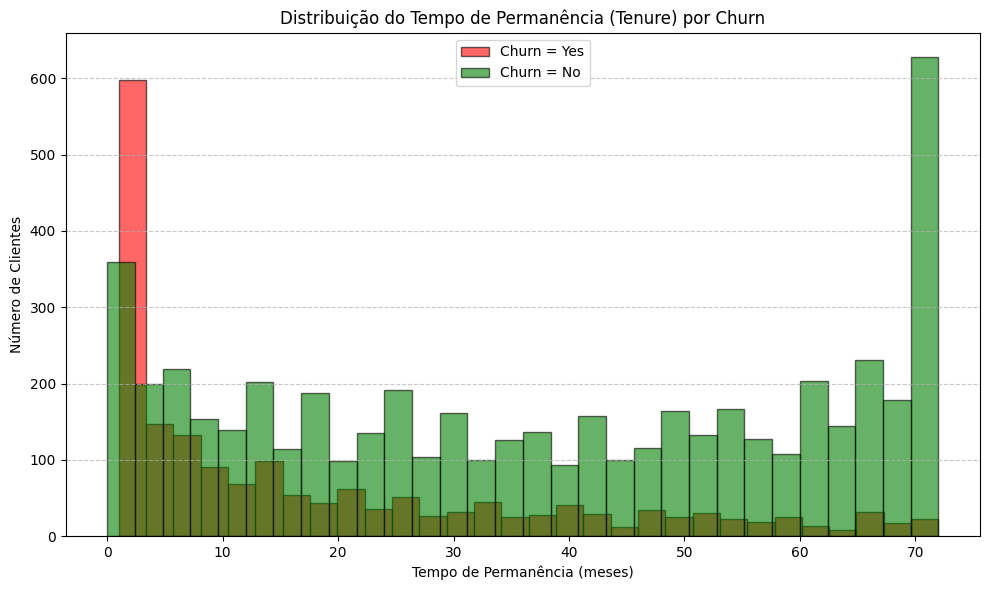

In [57]:
plt.figure(figsize=(10, 6))

plt.hist(df[df['Churn'] == 'Yes']['tenure'], bins=30, alpha=0.6, label='Churn = Yes', color='red', edgecolor='black')
plt.hist(df[df['Churn'] == 'No']['tenure'], bins=30, alpha=0.6, label='Churn = No', color='green', edgecolor='black')

plt.title('Distribuição do Tempo de Permanência (Tenure) por Churn')
plt.xlabel('Tempo de Permanência (meses)')
plt.ylabel('Número de Clientes')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

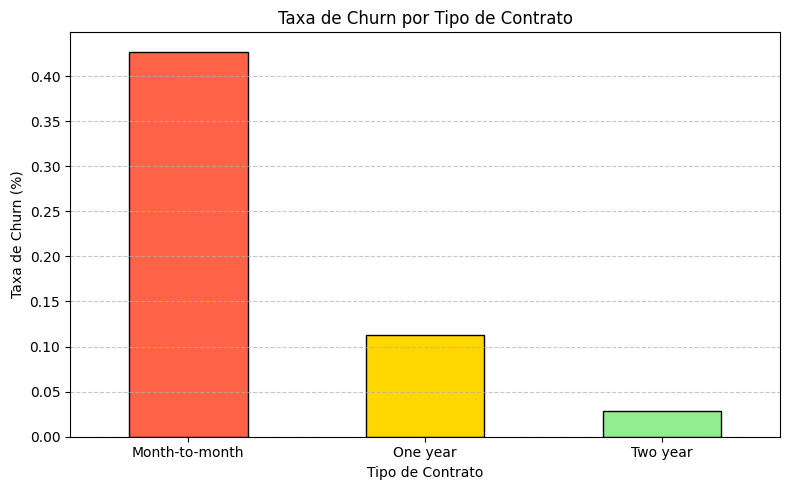

In [58]:
churn_rate_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()['Yes']
churn_rate_contract = churn_rate_contract[['Month-to-month', 'One year', 'Two year']]

plt.figure(figsize=(8, 5))
churn_rate_contract.plot(kind='bar', color=['tomato', 'gold', 'lightgreen'], edgecolor='black')

plt.title('Taxa de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Taxa de Churn (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

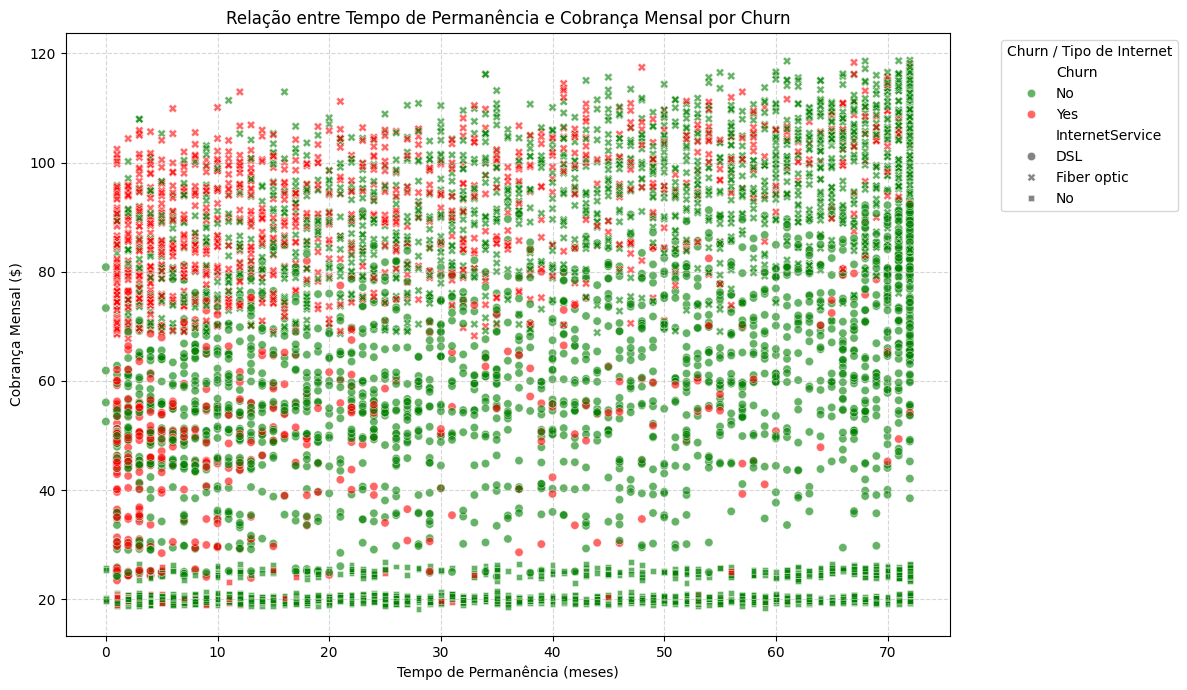

In [59]:
plt.figure(figsize=(12, 7))

palette = {'Yes': 'red', 'No': 'green'}

# Scatter plot
sns.scatterplot(
    data=df,
    x='tenure',
    y='MonthlyCharges',
    hue='Churn',
    style='InternetService',
    palette=palette,
    alpha=0.6
)

plt.title('Relação entre Tempo de Permanência e Cobrança Mensal por Churn')
plt.xlabel('Tempo de Permanência (meses)')
plt.ylabel('Cobrança Mensal ($)')
plt.grid(linestyle='--', alpha=0.5)
plt.legend(title='Churn / Tipo de Internet', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Os clientes com mais risco de churn são:
- Os clientes novos, que adquiriram o serviço a pouco tempo.
- Clientes com contratos de curto prazo.
- Clientes que pagam por serviços mais caros, apresentam maior quantidade de churn

#### Gênero do Cliente

Conforme a documentação da base de dados, há dois valores possíveis para o gênero do cliente, são eles:  
    - M: Masculino  
    - F: Feminino  
    
Tal como dispostos, segundo strings, essas informações não ajudam modelos que lidam apenas com dados numéricos. É necessário efetuar uma codificação para representar tais valores. Assim, codifique a coluna gender conforme a abordagem One-Hot Encoding e elimine a coluna original do dataset.

Referências:
- https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [60]:
gender_dummies = pd.get_dummies(df['gender'], prefix='gender')

df = pd.concat([df, gender_dummies], axis=1)

df.drop('gender', axis=1, inplace=True)

print(df.head())

   customerID  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG              0     Yes         No       1           No   
1  5575-GNVDE              0      No         No      34          Yes   
2  3668-QPYBK              0      No         No       2          Yes   
3  7795-CFOCW              0      No         No      45           No   
4  9237-HQITU              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   
3  No phone service             DSL            Yes           No  ...   
4                No     Fiber optic             No           No  ...   

         Contract PaperlessBilling              PaymentMethod MonthlyCharges  \
0  Month-to-month              Yes           Electroni

#### Codificação dos Atributos

- Se o atributo tiver duas categorias, repita o processo de codificação conforme proposto anteriormente.
- Senão se o atributo tiver entre três e até cinco categorias, utilize Label Encoding.
- Em caso contrário, elimine a coluna em questão.

Referências:
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html


In [61]:
df_cod = df[:]
cat_cols = df_cod.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
    n_unique = df_cod[col].nunique()

    if n_unique == 2:
        # One-Hot Encoding
        dummies = pd.get_dummies(df_cod[col], prefix=col)
        df_cod = pd.concat([df_cod, dummies], axis=1)
        df_cod.drop(col, axis=1, inplace=True)

    elif 3 <= n_unique <= 5:
        # Label Encoding
        le = LabelEncoder()
        df_cod[col] = le.fit_transform(df_cod[col])

    else:
        # Mais de 5 categorias → eliminar
        df_cod.drop(col, axis=1, inplace=True)


print(df_cod.head())
print("\nColunas restantes:", df_cod.columns.tolist())

   SeniorCitizen  tenure  MultipleLines  InternetService  OnlineSecurity  \
0              0       1              1                0               0   
1              0      34              0                0               2   
2              0       2              0                0               2   
3              0      45              1                0               2   
4              0       2              0                1               0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0             2                 0            0            0                0   
1             0                 2            0            0                0   
2             2                 0            0            0                0   
3             0                 2            2            0                0   
4             0                 0            0            0                0   

   ...  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes

/tmp/ipython-input-166879122.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cod.drop(col, axis=1, inplace=True)


#### O dataset é balanceado?

- Considera-se que o dataset é balanceado se não houver mais de 10% de diferença no quantitativo das classes nele presentes. Faça a avaliação nesses termos. Elabore gráficos que justificam sua resposta.
- A partir da resposta considerada, apresente quatro métricas de desempenho a serem utilizadas na avaliação comparativa de modelos para esse problema

In [62]:
class_counts = df['Churn'].value_counts()
total = class_counts.sum()
percentages = class_counts / total * 100

print("Contagem das classes:\n", class_counts)
print("\nPercentual de cada classe:\n", percentages)

# Verificar diferença máxima
diff_percent = abs(percentages['Yes'] - percentages['No'])
if diff_percent <= 10:
    print("\n✅ Dataset considerado balanceado (diferença ≤ 10%)")
else:
    print("\n⚠️ Dataset desbalanceado (diferença > 10%)")

Contagem das classes:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentual de cada classe:
 Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

⚠️ Dataset desbalanceado (diferença > 10%)


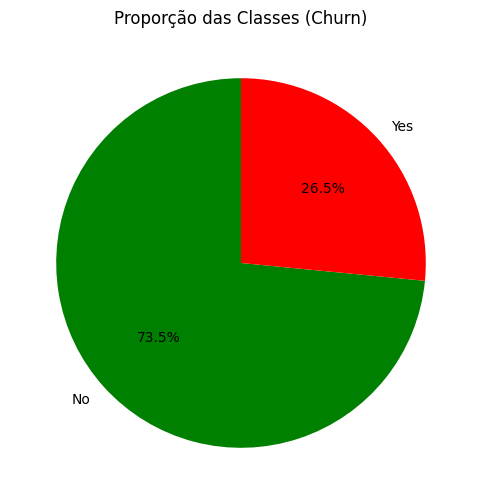

In [63]:
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['green','red'], startangle=90)
plt.title('Proporção das Classes (Churn)')
plt.show()

- Precision

Proporção de previsões positivas corretas sobre todas as positivas previstas.

- Recall

Proporção de positivos corretamente identificados sobre todos os positivos reais.

- F1-Score

Média harmônica entre precision e recall.

- ROC-AUC

Área sob a curva ROC (Receiver Operating Characteristic).

Avalia a capacidade do modelo em separar corretamente as duas classes, independente do limiar de decisão.

## Parte 2 - Tarefa de Aprendizado de Máquina

Abordaremos o problema da previsão de churn como uma tarefa de classificação binária.

#### Preparação dos dados para Validação Cruzada Holdout

- Vamos separar o atributo alvo (Age) dos atributores preditores.
  - Atributos preditores devem ser armazenados em uma variável denominada X  
  - Atributo alvo deve ser armazenado em uma variável denominada y
- Qual o tipo de entrada do modelo?
- Vamos efetuar uma partição do tipo holdout estratificada 70/30

Documentação completa disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#### Treinar um modelo de regressão logística para o problema

A Regressão Logística é uma técnica de Aprendizado de Máquina que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas.

1. Importe o modelo da biblioteca sklearn
2. Instancie o modelo com parâmetros padrão (default)
3. Execute o algoritmo de treinamento com os dados de treino

Documentação completa disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### Obtendo previsões do modelo

1. Selecione um exemplo arbitrário da partição de teste
2. Forneça os atributos preditores e obtenha a previsão da churn
3. O modelo previu a saída corretamente?

#### Avalie o modelo perante o conjunto de testes

1. Obtenha as métricas elencadas para o conjunto de testes
  * Efetue a importação de tais métricas a partir do pacote sklearn.metrics
2. Elabore uma visualização da matriz de confusão normalizada para as previsões do conjunto de testes
3. O modelo é bom para o problema? Justifique sua afirmação.

#### Treinar um modelo de K-Vizinhos Mais Próximos

É um algoritmo de Aprendizado de Máquina que baseia-se na média dos valores dos k vizinhos mais próximos a uma dada entrada para produzir uma estimativa para o atributo-alvo. É considerado "preguiçoso", mas muito mostra-se vantajoso por possuir um baixo custo computacional.

1. Efetue o treinamento do K-Vizinhos mais Próximos, considerando k = 5
2. Efetue o teste no modelo e obtenha as métricas de desempenho previamente indicadas.  

#### Treinar um modelo de Árvore de Decisão

É um modelo de aprendizado de máquina supervisionado, utilizado para problemas de classificação e regressão. Sua estrutura se assemelha a um fluxograma, em que cada nó interno representa um teste em uma atributo dado, cada ramo corresponde a um resultado desse teste, e cada nó folha a uma decisão final ou previsão. Destaca-se por sua interpretabilidade

1. Efetue o treinamento do Árvore de Decisão, utilizando o critério de entropia.
2. Efetue o teste no modelo e obtenha as métricas de desempenho previamente indicadas.  
3. Plote a árvore de decisão construída.

#### Síntese dos Resultados

- Agrupe as matrizes de confusão obtidas lado a lado
- Crie uma tabela com todos os modelos e métricas (Pretty Table)

#### Argumente

- Qual o melhor modelo para o problema em questão?
- Qual o grau de dificuldade da tarefa de aprendizado proposta? Justifique a partir dos elementos e resultados obtidos nas células anteriores.